# INFO6105 Data Science Engineering Methods and Tools

Assignment-1 ML Data Cleaning and Feature Selection

Link to Dataset: https://github.com/bhagyatrivedi/DSEM_dataset

ML Data Cleaning and Feature Selection

In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.

#Dataset

The dataset consists of socio-economic information and credit card bill payments related information of the customers. Such data helps the financial institutions to predict if an applicant is 'good' or 'bad' client and whehter their credit card should be approved or not.

The dataset consists of 2 csv files.

* **application_record.csv** - It is the table that has information about the customer regarding their application, financial and household information including all the assets.

1. `ID`: `Client identification number`
2. `CODE_GEN`: `Client gender`
3. `FLAG_OWN_CAR`: `Is there a car?`
4. `FLAG_OWN_REALTY`: `Is there a property?`
5. `CNT_CHILDREN`: `Number of children`
6. `AMT_INCOME_TOTAL`: `Total annual income`
7. `NAME_INCOME_TYPE`: `Income category`
8. `NAME_EDUCATION_TYPE`: `Education level of the client`
9. `NAME_FAMILY_STATUS`: `Marital status`
10. `NAME_HOUSING_TYPE`: `Type of living`
11. `DAYS_BIRTH`: `	Count backwards from current day (0), -1 means yesterday`
12. `DAYS_EMPLOYED`: `Count backwards from current day(0). If positive, it means the person currently unemployed.`
13. `FLAG_MOBIL`: `Is there a mobile phone?`
14. `FLAG_WORK_PHONE`: `Is there a work phone?`
15. `FLAG_PHONE`: `Is there a phone?`
16. `FLAG_EMAIL`: `Is there any email?`
17. `OCCUPATION_TYPE`: `Occupation of the client`
18. `CNT_FAM_MEMBERS`: `Size of the Family`

* **credit_records.csv** - It its the table that has all the payment related information for a given customer.

1. `ID`: `Client identification number`
2. `MONTH_BALANCE`: `The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on`
3. `STATUS`: `0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month`

Both the tables are connected with `ID`.

In [1495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1496]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [1497]:
df1 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/application_record.csv');

In [1498]:
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [1499]:
df1.shape

(438557, 18)

In [1500]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [1501]:
df1['ID'].duplicated().sum()

47

In [1502]:
df1 = df1.drop_duplicates(subset='ID',keep='first')

In [1503]:
df1.shape

(438510, 18)

In [1504]:
df1.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [1505]:
df1.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [1506]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [1507]:
df1['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [1508]:
df1['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [1509]:
df1['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [1510]:
df1['FLAG_MOBIL'].value_counts()

1    438510
Name: FLAG_MOBIL, dtype: int64

In [1511]:
df1['FLAG_WORK_PHONE'].unique()

array([1, 0])

In [1512]:
df1['FLAG_PHONE'].unique()

array([0, 1])

In [1513]:
df1['FLAG_EMAIL'].unique()

array([0, 1])

In [1514]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [1515]:
df1['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [1516]:
df1['OCCUPATION_TYPE'].value_counts(dropna=False)

not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [1517]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-23642.00,-23413.00,-23181.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-9655.00,-9343.0,-9011.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-9533.00,-8486.00,-7792.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0


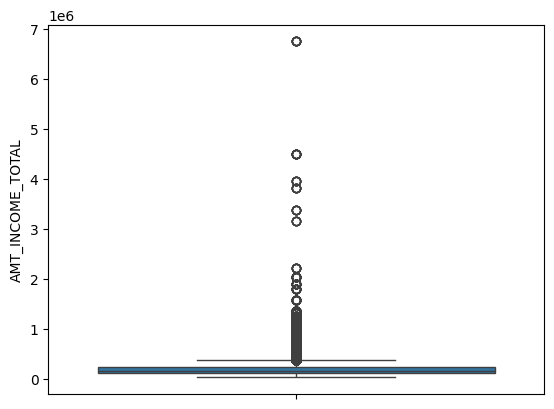

In [1518]:
sns.boxplot(df1,y='AMT_INCOME_TOTAL')

plt.show()

<Axes: ylabel='CNT_CHILDREN'>

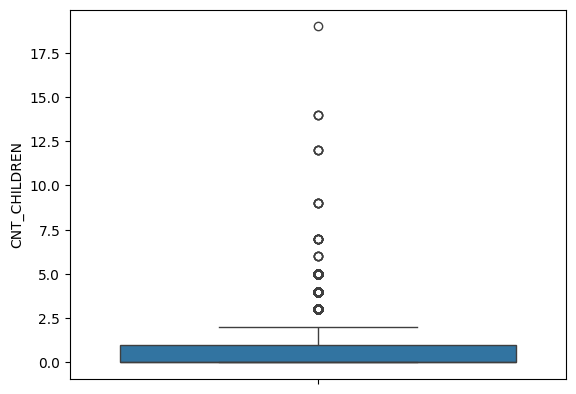

In [1519]:
sns.boxplot(data=df1, y=df1['CNT_CHILDREN'])

In [1520]:
df1['DAYS_EMPLOYED'].max()


365243

<Axes: ylabel='DAYS_BIRTH'>

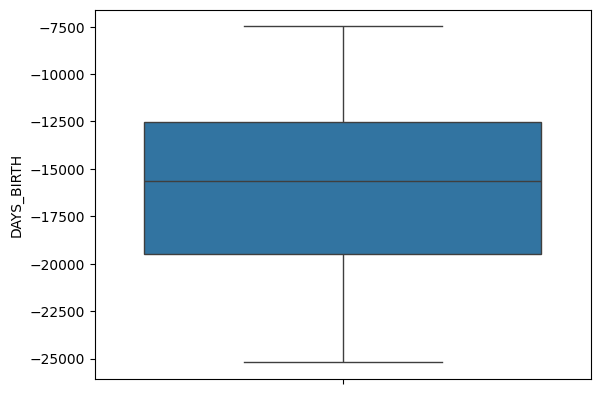

In [1521]:
sns.boxplot(data=df1, y=df1['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

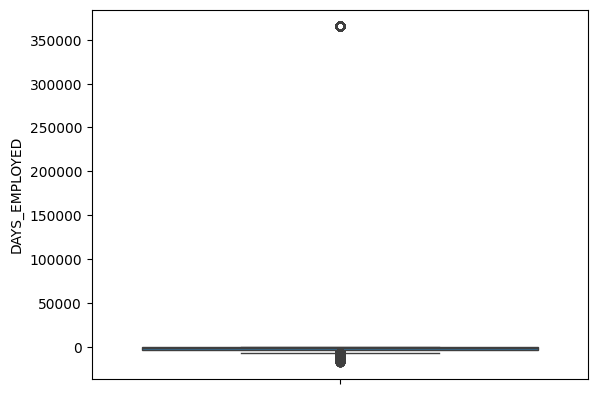

In [1522]:
sns.boxplot(data=df1, y=df1['DAYS_EMPLOYED'])

In [1523]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

365243    75324
Name: DAYS_EMPLOYED, dtype: int64

In [1524]:
df1['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [1525]:
df1[df1['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

0    75324
Name: DAYS_EMPLOYED, dtype: int64

In [1526]:
df1['AGE_YEARS']=round(-df1['DAYS_BIRTH']/365.2425,0)

In [1527]:
df1['YEARS_EMPLOYED']=round(-df1['DAYS_EMPLOYED']/365.2425)
df1.loc[df1['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [1528]:
df1.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [1529]:
df1.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,23.00,25.00,26.00,26.00,27.00,29.0,34.00,43.00,53.00,60.0,63.00,63.00,64.0,65.00,66.00,69.0
YEARS_EMPLOYED,438510.0,5.956069e+00,6.574244,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,4.00,8.00,14.0,20.00,21.00,23.0,26.00,30.00,48.0


In [1530]:
df1['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

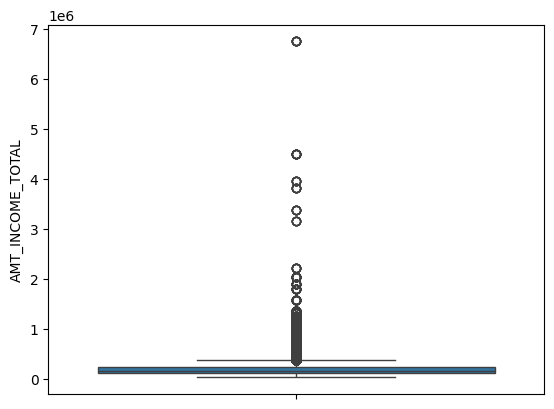

In [1531]:
sns.boxplot(df1,y='AMT_INCOME_TOTAL')

In [1532]:
df1[df1['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


<ipython-input-1533-01bc35363367>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


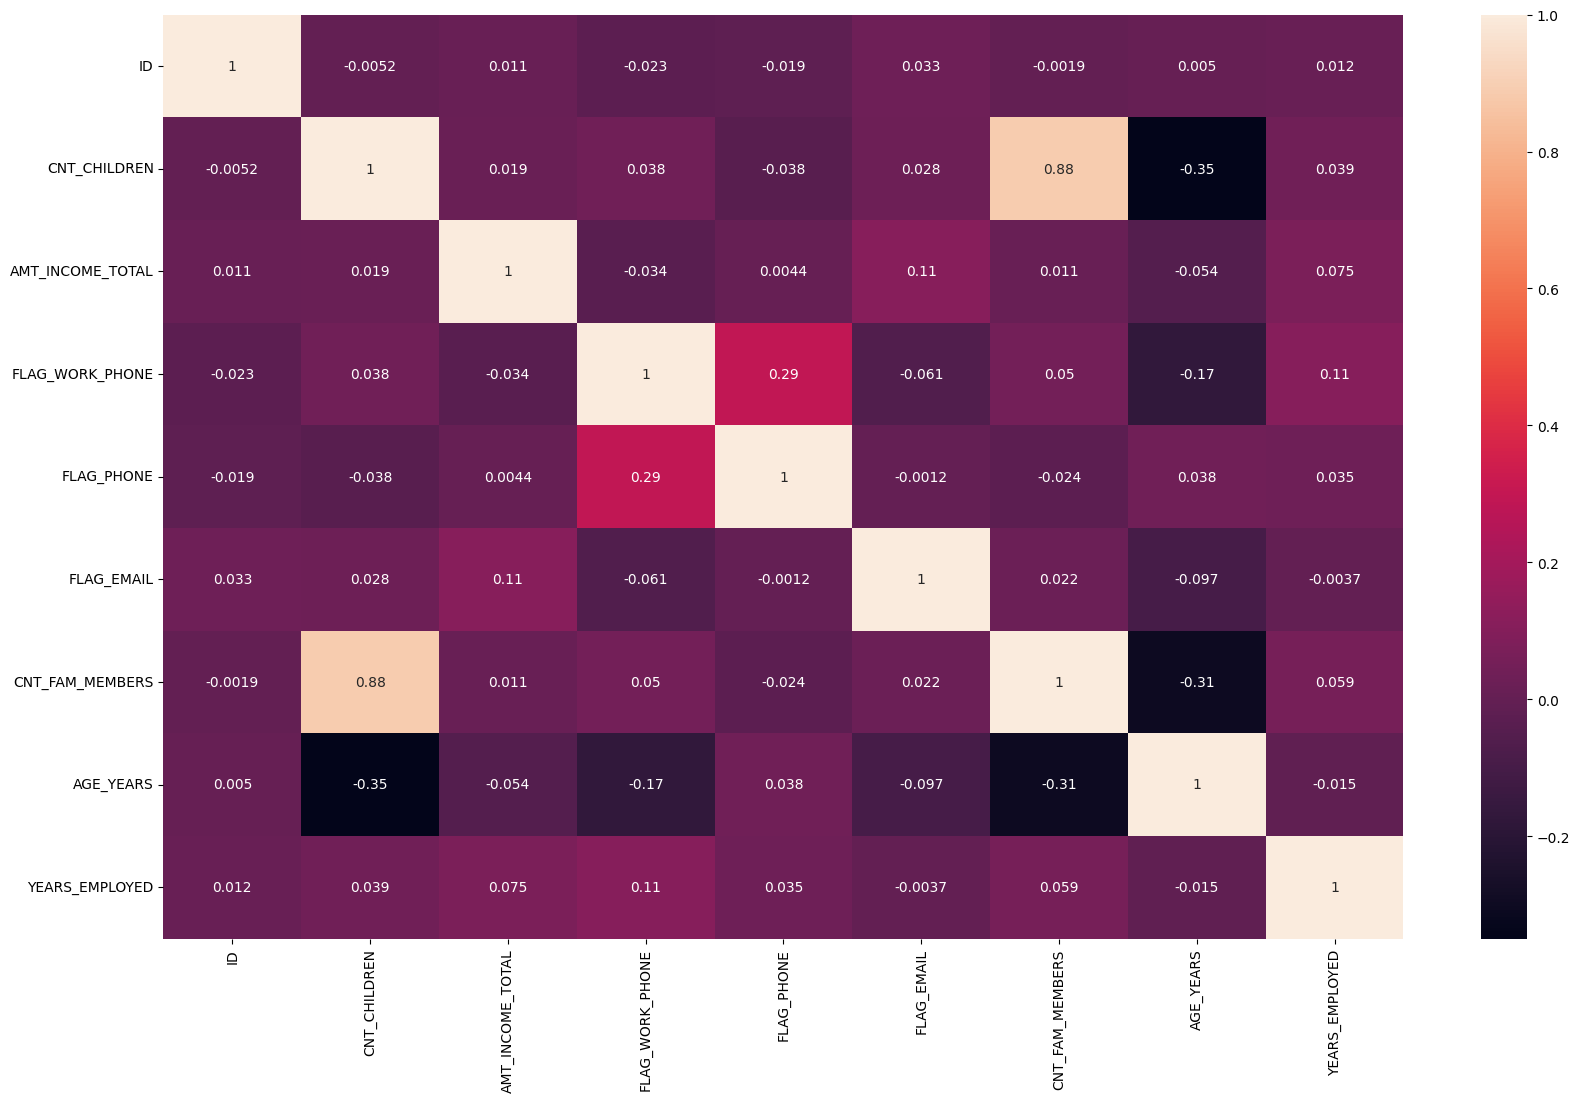

In [1533]:
df1.drop(columns=["FLAG_MOBIL"],inplace=True)
corr = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

In [1534]:
df2 = pd.read_csv('https://raw.githubusercontent.com/bhagyatrivedi/DSEM_dataset/main/credit_record.csv')

In [1535]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [1536]:
df2.shape

(1048575, 3)

In [1537]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [1538]:
df2.duplicated().sum()

0

In [1539]:
df2['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [1540]:
df2['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [1541]:
df2[df2['STATUS'].isin(['X', 'C'])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [1542]:
df2['ID'].nunique()

45985

In [1543]:
df2['target']=df2['STATUS']
df2['target'].replace('X', 0, inplace=True)
df2['target'].replace('C', 0, inplace=True)
df2['target']=df2['target'].astype(int)
df2.loc[df2['target']>=1,'target']=1

In [1544]:
df3=pd.DataFrame(df2.groupby(['ID'])['target'].agg("max")).reset_index()

In [1545]:
df3["target"].value_counts()

0    40635
1     5350
Name: target, dtype: int64

We merge the two tables using inner join.

In [1546]:
df = pd.merge(df1, df3, how='inner', on=['ID'])

In [1547]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,not_specified,2.0,33.0,12.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,not_specified,2.0,33.0,12.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Managers,2.0,47.0,7.0,1
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,34.0,4.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,34.0,4.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Sales staff,2.0,49.0,2.0,1


In [1548]:
start_df = pd.DataFrame(df2.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [1549]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [1550]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

In [1551]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int64
ACCOUNT_LENGTH           int64
dtype: object

In [1552]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,0.225526,0.294813,0.089722,2.198453,43.747017,6.036783,0.117700,26.164193
std,4.187524e+04,0.742367,1.017892e+05,0.417934,0.455965,0.285787,0.911686,11.514045,6.488058,0.322257,16.501854
min,5.008804e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,43.000000,4.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,53.000000,9.000000,0.000000,39.000000
max,5.150487e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,69.000000,43.000000,1.000000,60.000000


In [1553]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

In [1554]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int64
ACCOUNT_LENGTH           int64
dtype: object

In [1555]:
import pandas as pd


# Get numerical column names
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(num_cols)

# Get categorical column names
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(cat_cols)


Numerical Columns:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

Categorical Columns:
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


In [1556]:
df.target.value_counts()

0    32166
1     4291
Name: target, dtype: int64

# Analysis of numerical and categorical variables


In [1557]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH']


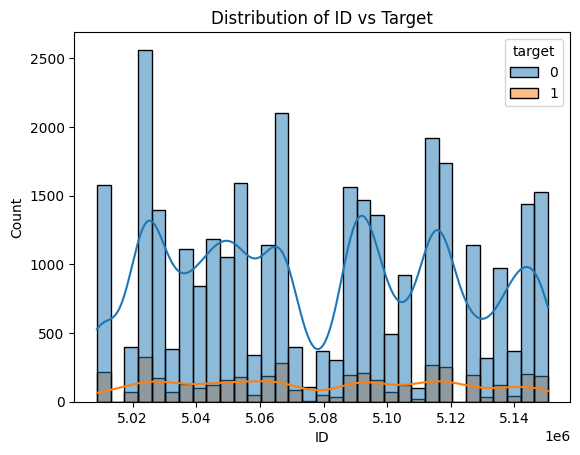

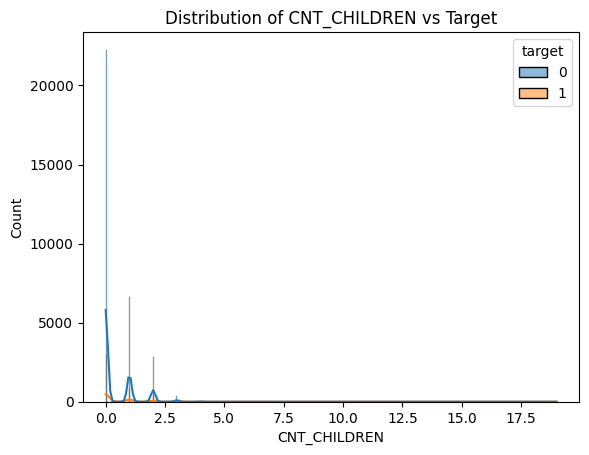

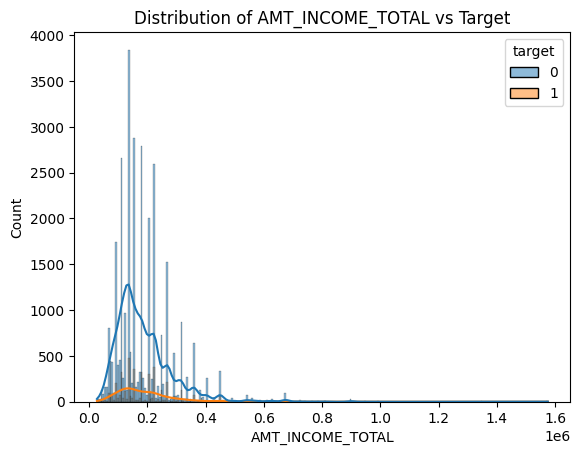

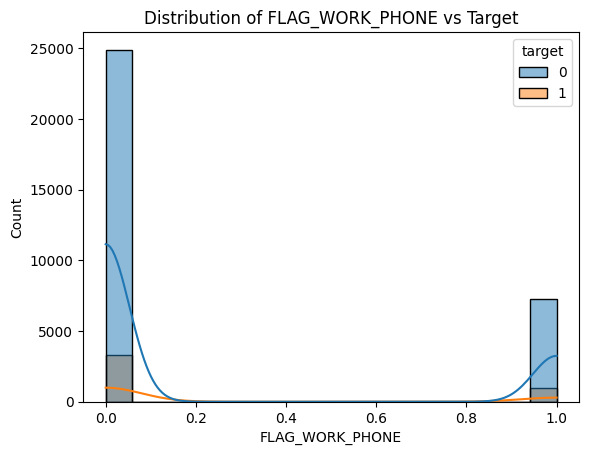

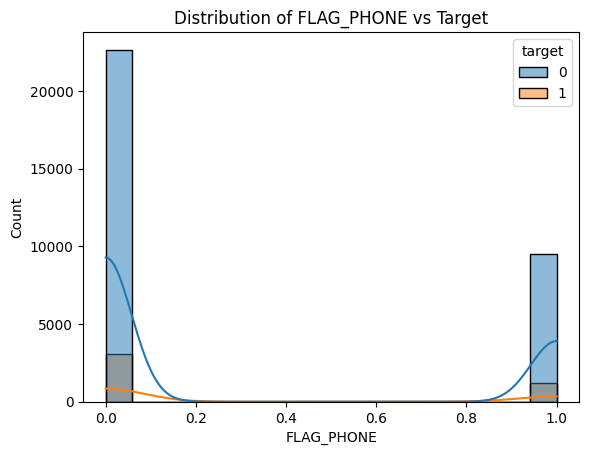

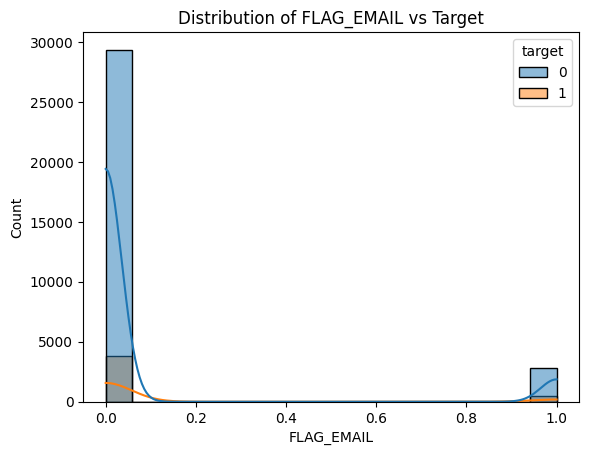

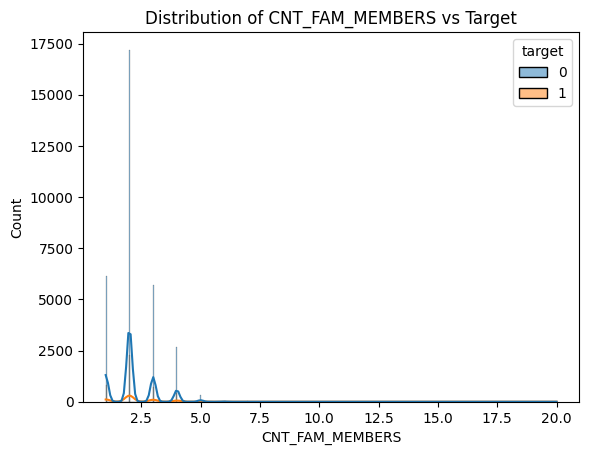

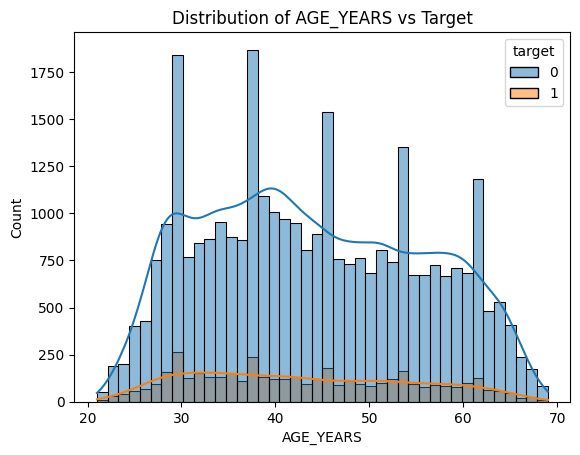

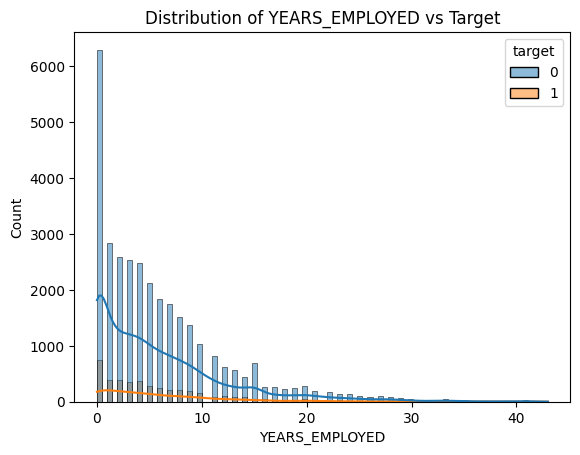

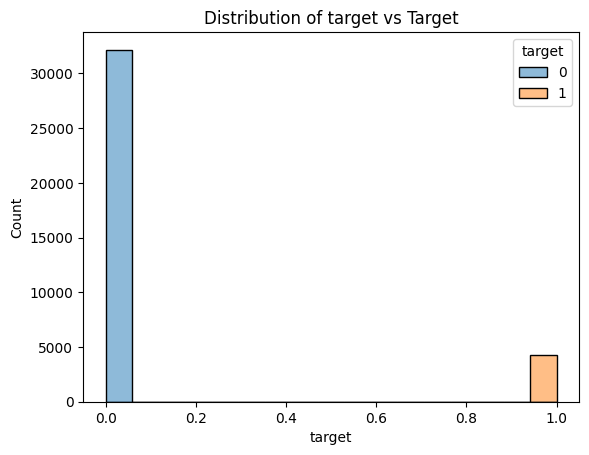

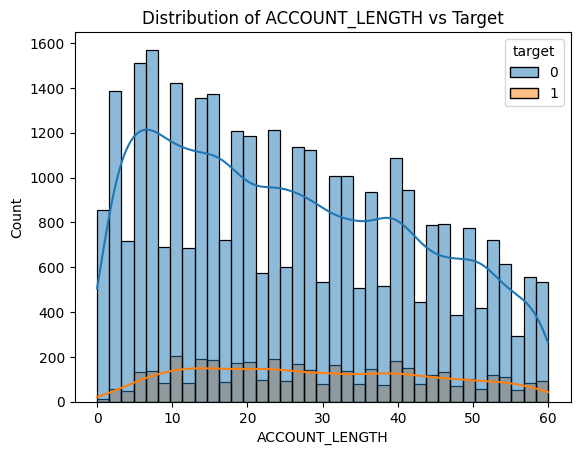

In [1558]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x = col, hue = 'target',kde=True)
  plt.title(f'Distribution of {col} vs Target')
  plt.show()
  print("\n")


<ipython-input-1559-beba7af7f145>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


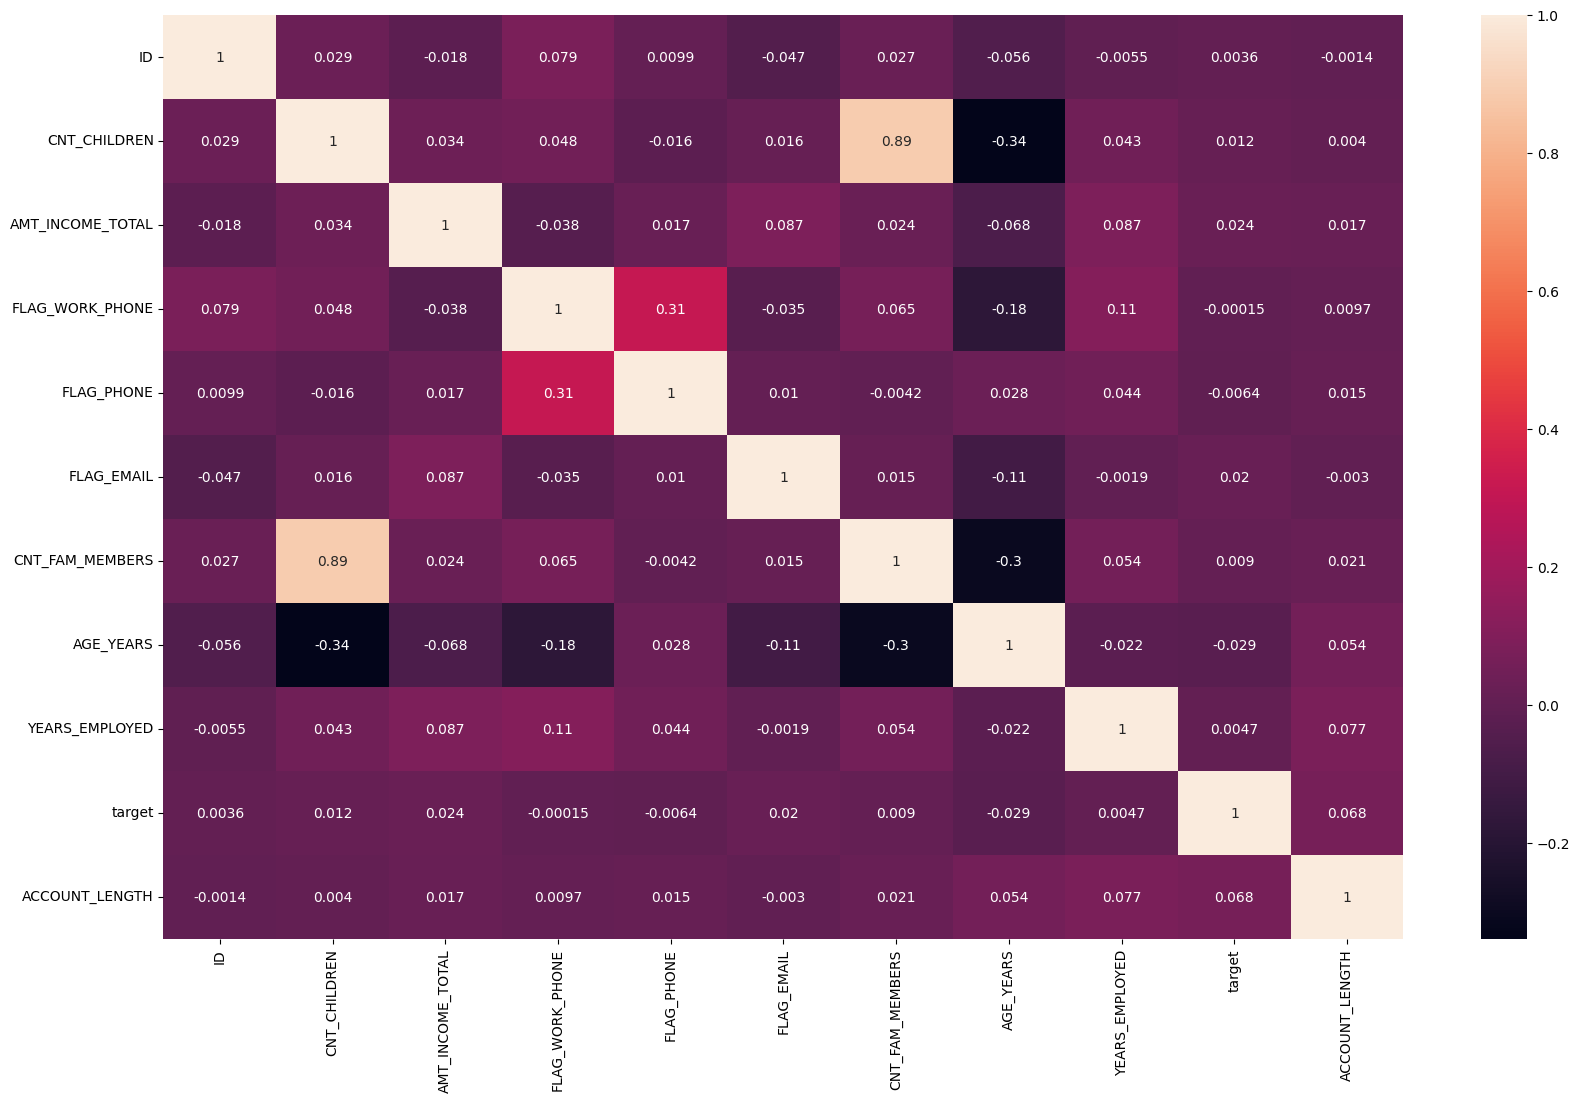

In [1559]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

<ipython-input-1560-77a16bfa0140>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm_r')


0    32166
1     4291
Name: target, dtype: int64

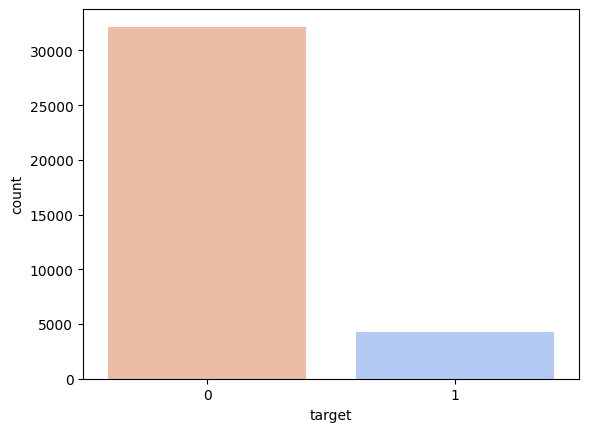

In [1560]:
sns.countplot(x='target', data=df, palette='coolwarm_r')
df['target'].value_counts()

In [1561]:
df.corr()['target'].sort_values(ascending=False)

<ipython-input-1561-a3f116aeaf7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['target'].sort_values(ascending=False)


target              1.000000
ACCOUNT_LENGTH      0.067564
AMT_INCOME_TOTAL    0.024202
FLAG_EMAIL          0.019658
CNT_CHILDREN        0.011525
CNT_FAM_MEMBERS     0.009004
YEARS_EMPLOYED      0.004712
ID                  0.003565
FLAG_WORK_PHONE    -0.000149
FLAG_PHONE         -0.006355
AGE_YEARS          -0.028849
Name: target, dtype: float64

In [1562]:
df.corr().info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, ID to ACCOUNT_LENGTH
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11 non-null     float64
 1   CNT_CHILDREN      11 non-null     float64
 2   AMT_INCOME_TOTAL  11 non-null     float64
 3   FLAG_WORK_PHONE   11 non-null     float64
 4   FLAG_PHONE        11 non-null     float64
 5   FLAG_EMAIL        11 non-null     float64
 6   CNT_FAM_MEMBERS   11 non-null     float64
 7   AGE_YEARS         11 non-null     float64
 8   YEARS_EMPLOYED    11 non-null     float64
 9   target            11 non-null     float64
 10  ACCOUNT_LENGTH    11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB


<ipython-input-1562-aa1cf9032966>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().info()


In [1563]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

Data Loading and Preprocessing
The dataset was imported from a CSV file, containing records of customers with attributes such as age, income, employment details, and credit information. Initial preprocessing involved cleaning missing values, particularly in the 'Occupation Type' field, which had a significant number of missing entries. Duplicates were checked and found to be non-existent, ensuring data integrity. Categorical variables were encoded to facilitate analysis, and data types were adjusted for computational efficiency.

We dropped ID and CNT_CHILDREN columns as they seem redundant for our model having a biased distribution.

<ipython-input-1564-beba7af7f145>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


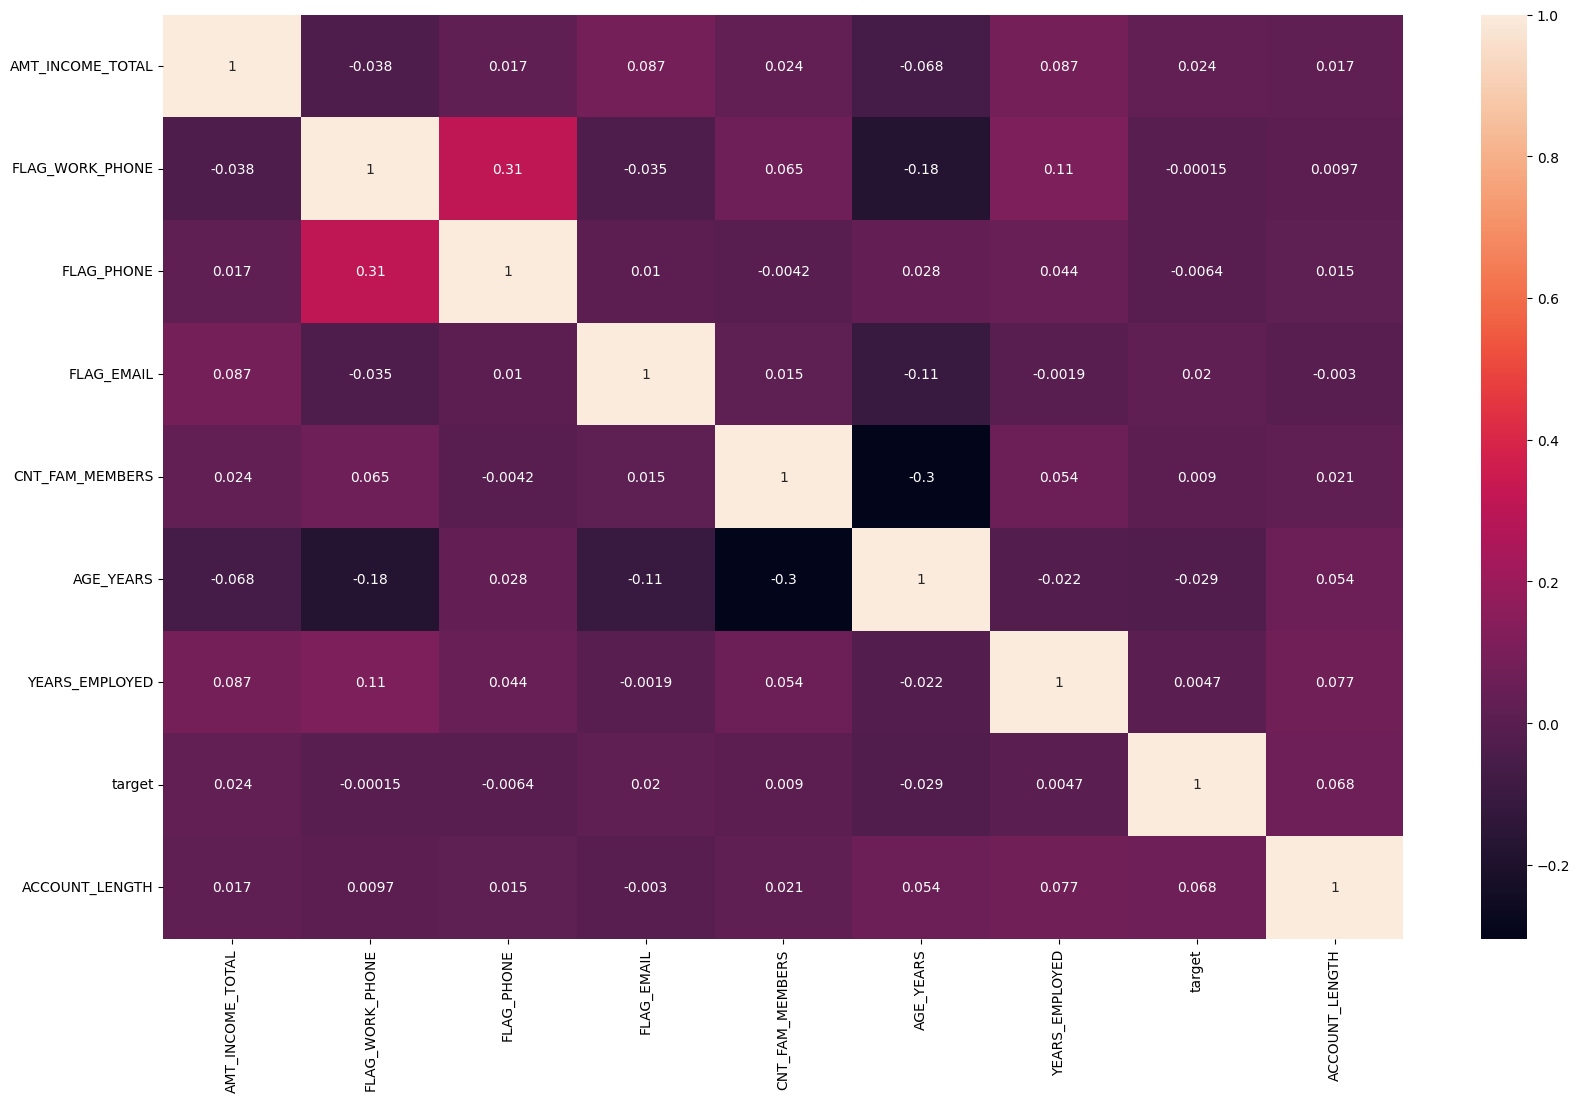

In [1564]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)
plt.show()

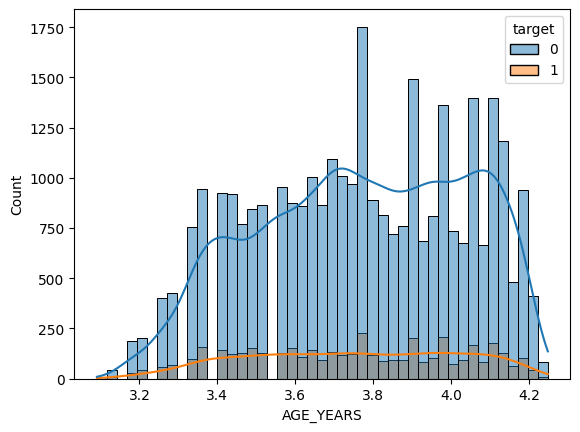

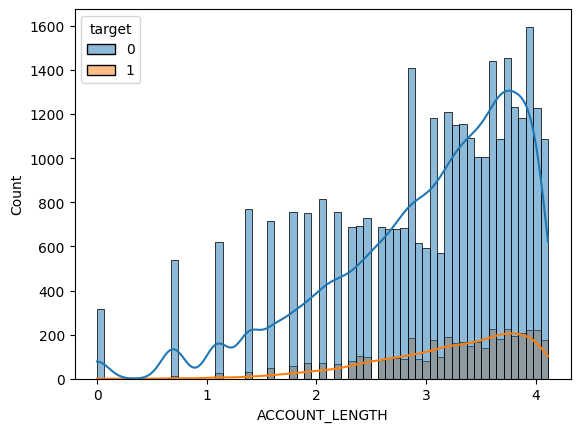

In [1565]:
# create a list of columns for applying log transformations
log_list = ['AGE_YEARS','ACCOUNT_LENGTH']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='target',kde=True)
  plt.show()

After applying the log transformation we can see that the distributions of age and final-weight are much more even and closer to normal than before.

**Analyzing categorical features**

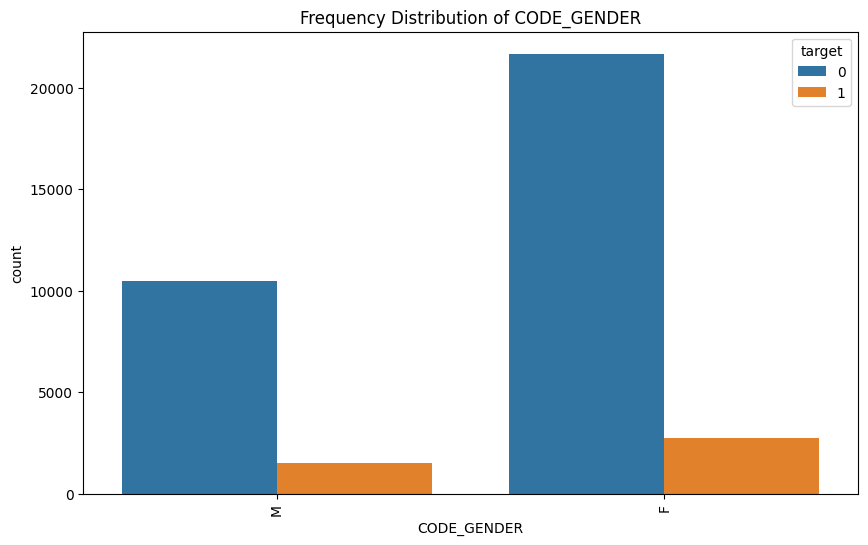

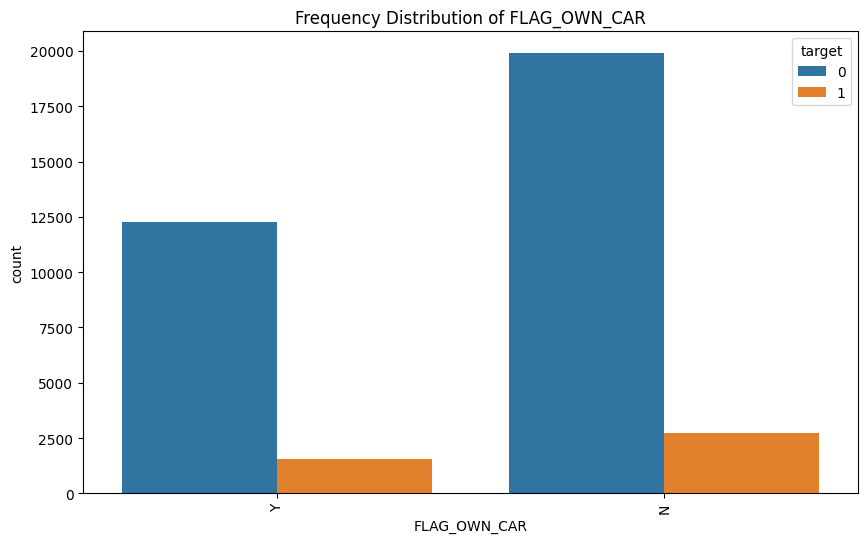

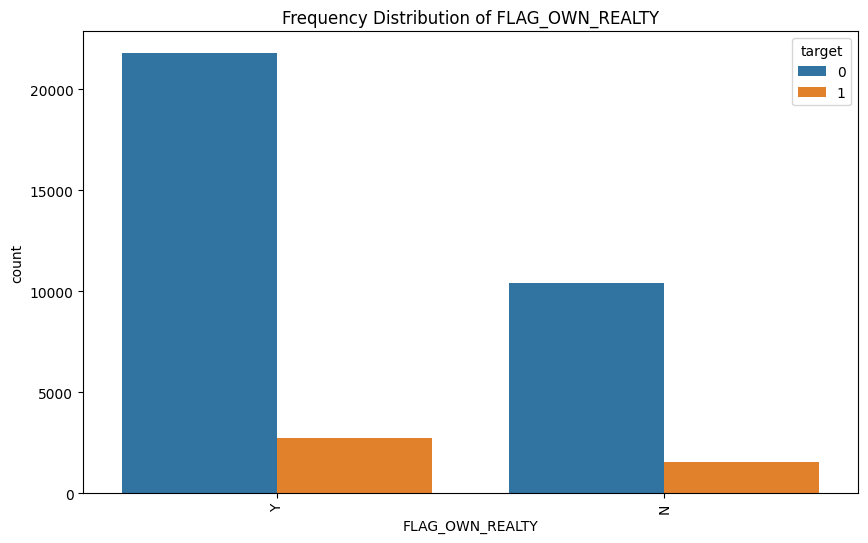

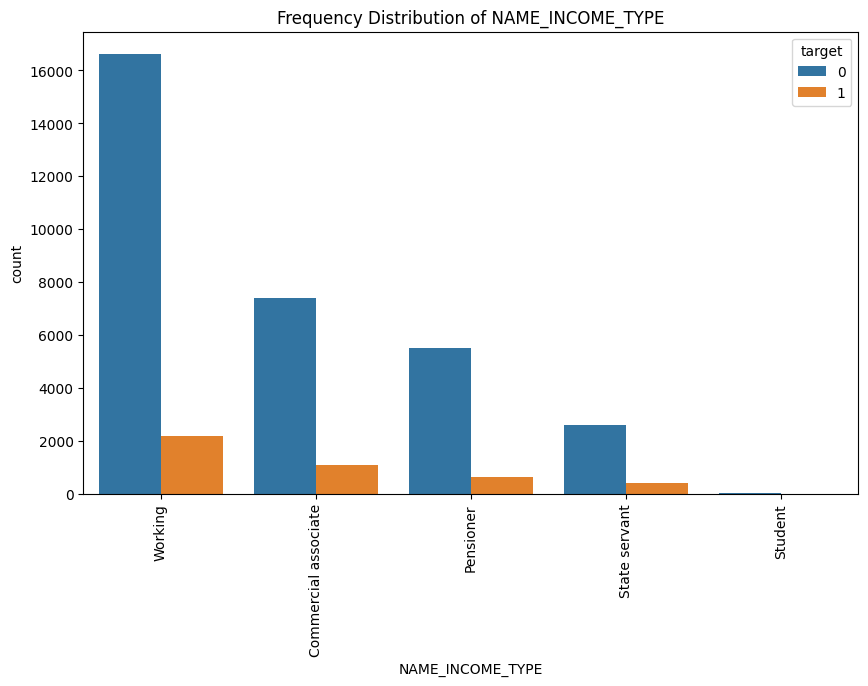

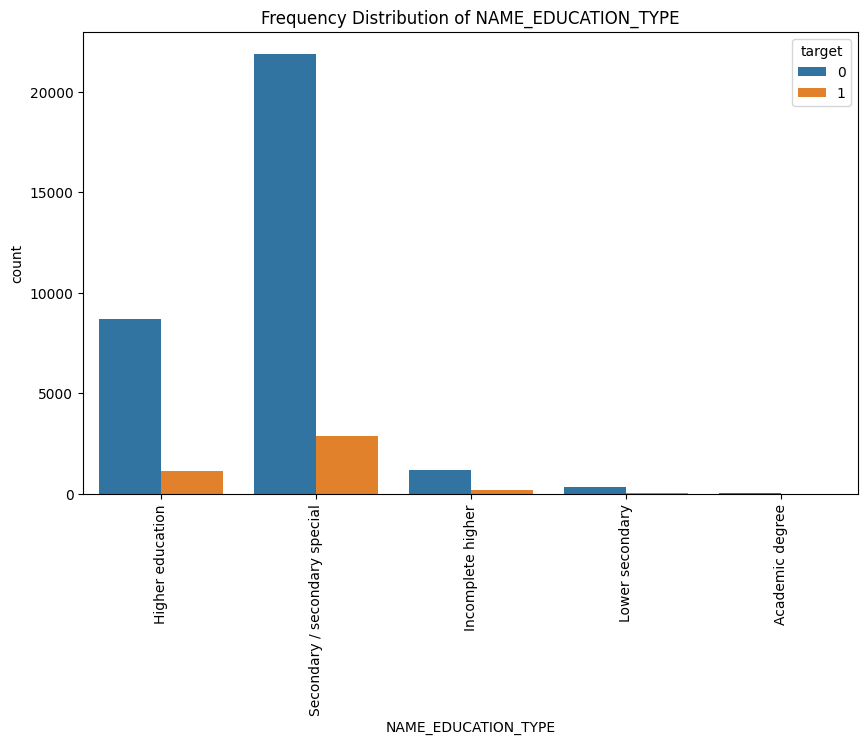

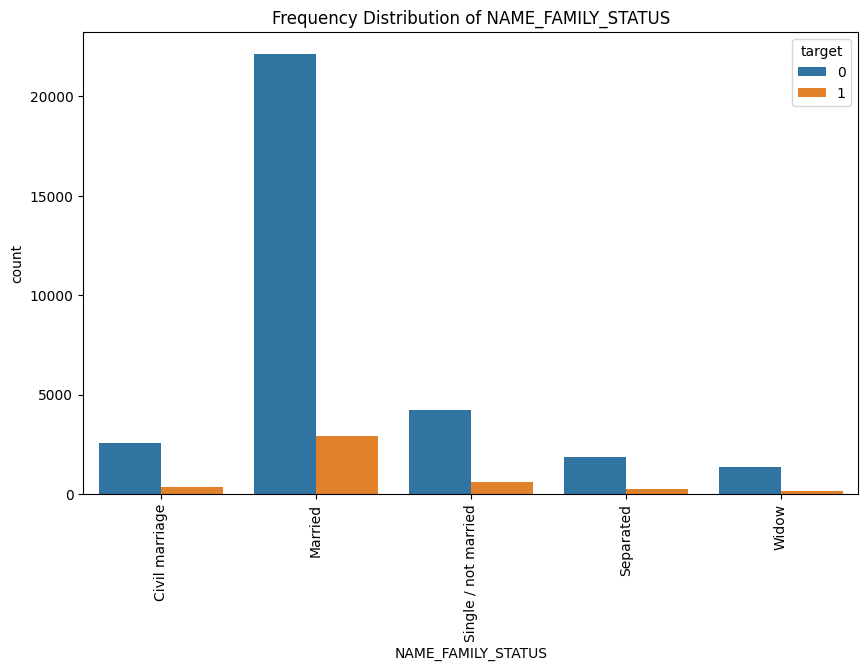

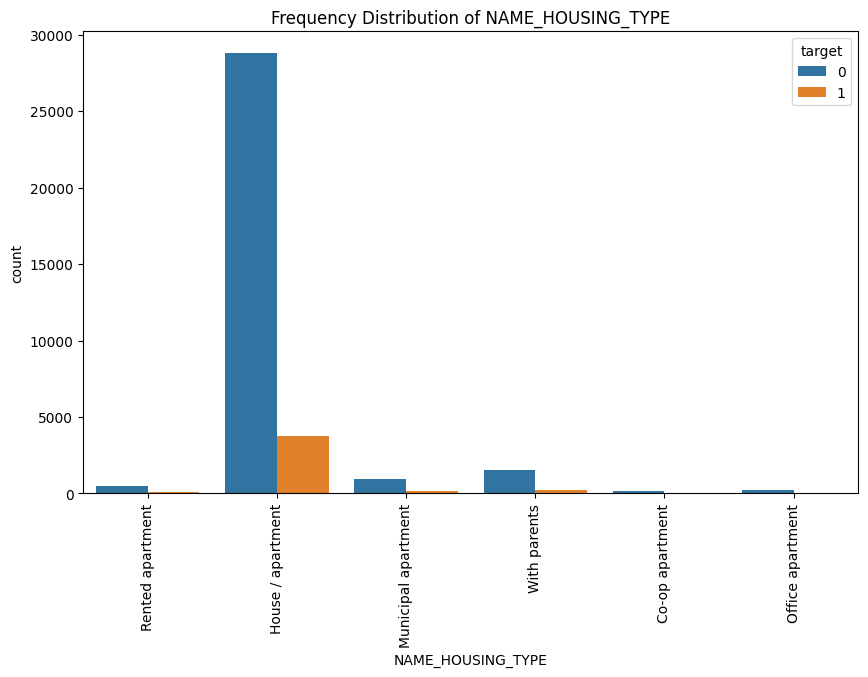

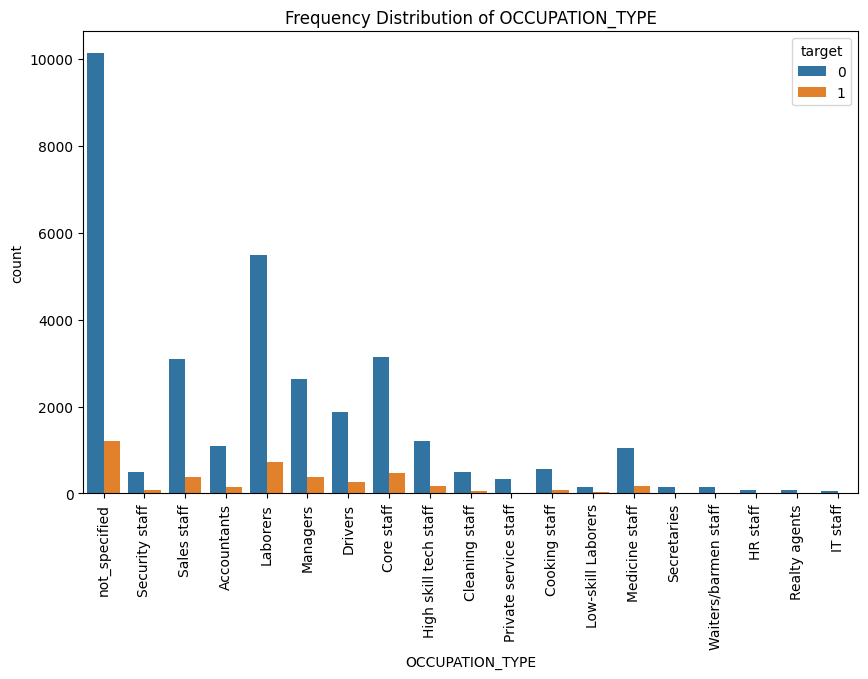

In [1566]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# plotting frequency distribution for categorical variables

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='target')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

# Feature Engineering

<ipython-input-1567-b41e8f2749e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


Text(0.5, 1.0, ' Correlation heatmap')

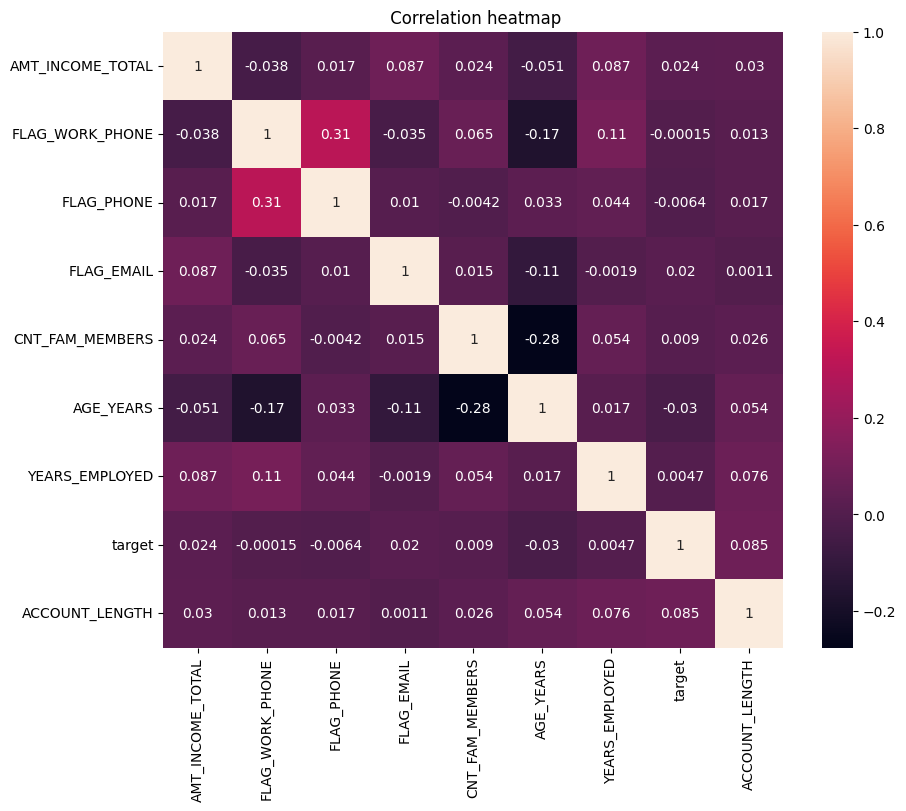

In [1567]:
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")


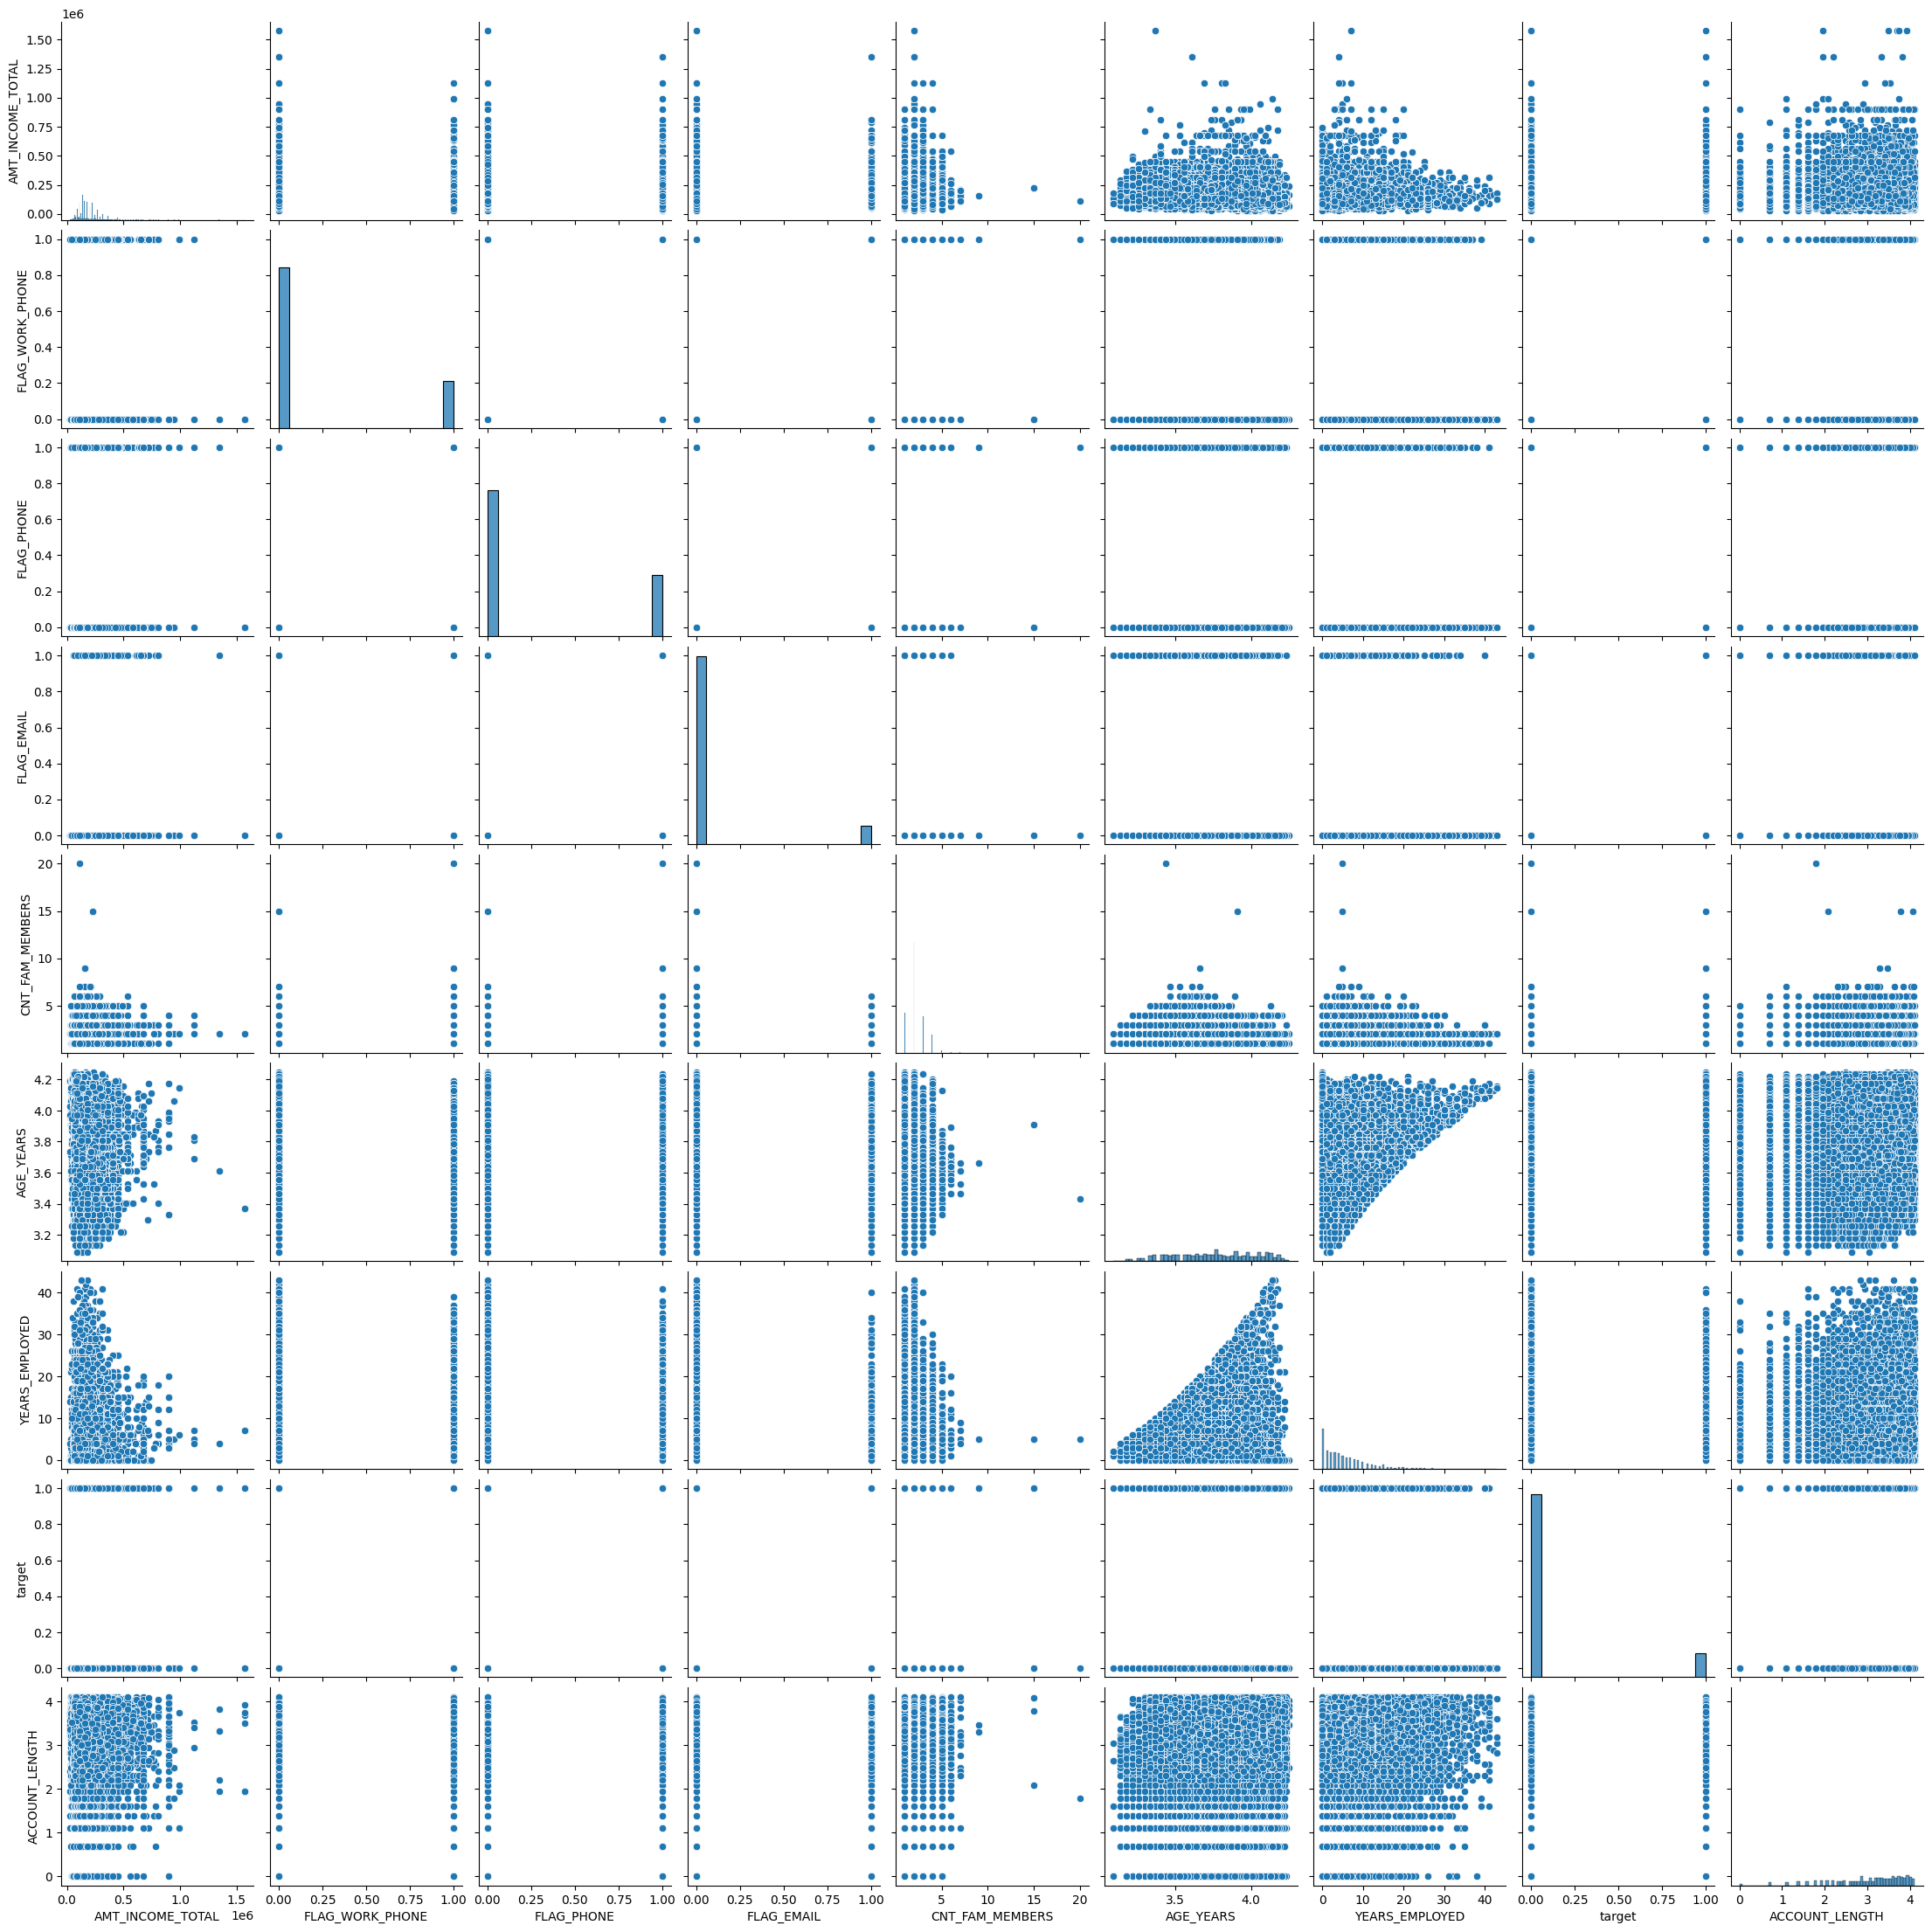

In [1568]:
plt = sns.pairplot(data=df)

**One Hot Encoding**

In [1569]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [1570]:
dummy = df.copy()

In [1571]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [1572]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [1573]:
df

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,2.365845,-0.217680,-0.908134,0.919119,1,2.772589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.365845,-0.217680,-0.908134,0.919119,1,2.708050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.728827,-0.217680,1.237411,-0.468064,0,3.401197,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.818509,-1.314564,0.768805,0.302593,0,1.609438,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.818509,-1.314564,0.768805,0.302593,0,3.295837,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.260605,-0.217680,0.394492,0.148462,1,2.484907,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,-0.286731,-0.217680,-0.798634,-0.313932,1,3.178054,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,-0.286731,-0.217680,-0.798634,-0.313932,1,3.496508,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,0.951138,-0.217680,0.548696,-0.622195,1,2.302585,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1574]:
df.describe()

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
count,3.645700e+04,3.645700e+04,3.645700e+04,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,1.559191e-18,2.424542e-16,3.130855e-15,-7.717994e-17,0.117700,3.031873,0.670105,0.329895,0.620292,0.379708,...,0.004800,0.082618,0.033107,0.009436,0.002167,0.095592,0.004142,0.016238,0.004773,0.310585
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.322257,0.846592,0.470181,0.470181,0.485321,0.485321,...,0.069118,0.275308,0.178920,0.096680,0.046501,0.294035,0.064225,0.126392,0.068921,0.462740
min,-1.568810e+00,-1.314564e+00,-2.552536e+00,-9.304580e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.404080e-01,-2.176798e-01,-7.986341e-01,-7.763266e-01,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.867311e-01,-2.176798e-01,6.580885e-02,-3.139323e-01,0.000000,3.218876,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.764130e-01,8.792039e-01,8.394143e-01,4.567249e-01,0.000000,3.688879,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.363930e+01,1.952623e+01,1.819711e+00,5.697194e+00,1.000000,4.110874,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1575]:
df.corr()['target'].sort_values(ascending=False)

target                                               1.000000
ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257
OCCUPATION_TYPE_Low-skill Laborers                   0.015274
OCCUPATION_TYPE_Security staff                       0.014359
NAME_FAMILY_STATUS_Single / not married              0.013716
OCCUPATION_TYPE_Core staff                           0.011522
OCCUPATION_TYPE_Managers                             0.010972
FLAG_OWN_CAR_N                                       0.010580
NAME_INCOME_TYPE_State servant                       0.010451
OCCUPATION_TYPE_Medicine staff                       0.009960
NAME_EDU

#Exploratory Data Analysis (EDA)
Summary statistics revealed key insights, such as the average income level, age distribution, and employment tenure among the customers. Visualizations like histograms and scatter plots provided a deeper understanding of the distribution of key variables. For instance, the income distribution was right-skewed, indicating a smaller number of high-income customers. Box plots highlighted outliers in variables like age and employment years, suggesting the presence of exceptionally old or long-tenured individuals.
A correlation analysis was conducted to explore relationships between variables. The findings indicated a weak correlation between age and income levels, suggesting that higher income is not necessarily associated with older age in this dataset. However, a moderate positive correlation was observed between employment tenure and credit amount, implying that longer-employed individuals tend to have higher credit amounts.

# Model Implementation

In [1576]:
X= df.drop(['target'], axis=1)
y= df['target']


In [1577]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [1578]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [1579]:
# importing model libraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

# predicting test cases
y_pred = model.predict(X_test)
print(y_test)

21900    0
24293    0
19633    1
2496     0
25932    0
        ..
12738    0
29745    0
17518    0
34043    0
26570    0
Name: target, Length: 10938, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1580]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9601
           1       0.00      0.00      0.00      1337

    accuracy                           0.88     10938
   macro avg       0.44      0.50      0.47     10938
weighted avg       0.77      0.88      0.82     10938



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1581]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,88.424311,87.776559


In [1582]:
#importing neccessary libraries
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

dt=model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(y_test,dt))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      9601
           1       0.29      0.29      0.29      1337

    accuracy                           0.83     10938
   macro avg       0.60      0.60      0.60     10938
weighted avg       0.83      0.83      0.83     10938



In [1583]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,99.090873,82.675078


In [1584]:
# from sklearn.svm import SVC
# model=SVC(kernel="rbf")
# model.fit(X_train,y_train)
# sv=model.predict(X_test)
# from sklearn import metrics
# print(metrics.classification_report(y_test,sv))

In [1585]:

from sklearn.metrics import accuracy_score

test_score = accuracy_score(y_test, model.predict(X_test)) * 100
train_score = accuracy_score(y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Support Vector Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Support Vector Classifier,99.090873,82.675078


In [1586]:
# Now we create confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9601    0]
 [1337    0]]


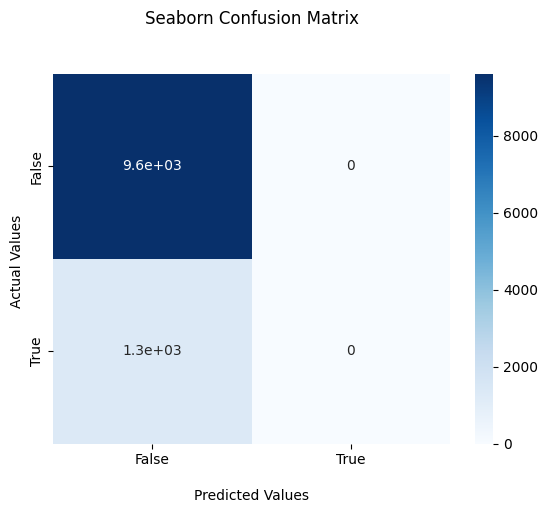

In [1587]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt

#We see that there is a high data imbalance and it needs to be balanced. We will Handle the Imbalancing of data using SMOTE

# Handling data imbalance using SMOTE

In [1588]:
col = list(df.columns)
type(col)
col.remove('target')

In [1589]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_trainr, X_testr,y_trainr,y_testr = train_test_split(X,y,test_size=0.3,random_state = 42)


In [1590]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy='auto')
X_train_resampled, y_train_resampled = smote.fit_resample(X_trainr, y_trainr)

In [1591]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_resampled,y_train_resampled)

# predicting test cases
y_pred = model.predict(X_testr)
print(y_pred)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1592]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(y_testr,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9601
           1       0.13      0.04      0.06      1337

    accuracy                           0.85     10938
   macro avg       0.51      0.50      0.49     10938
weighted avg       0.79      0.85      0.81     10938



In [1593]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_testr, y_pred)
print(conf_matrix)

[[9261  340]
 [1285   52]]


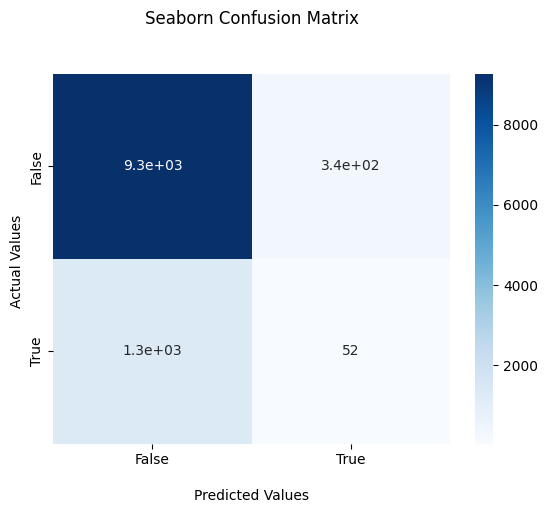

In [1594]:
axes = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

axes.set_title('Seaborn Confusion Matrix\n\n');
axes.set_xlabel('\nPredicted Values')
axes.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
axes.xaxis.set_ticklabels(['False','True'])
axes.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt

## Application of outliers in order to check and recheck any sort of value change.

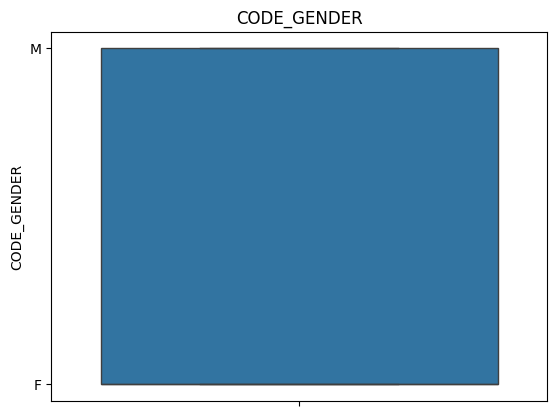

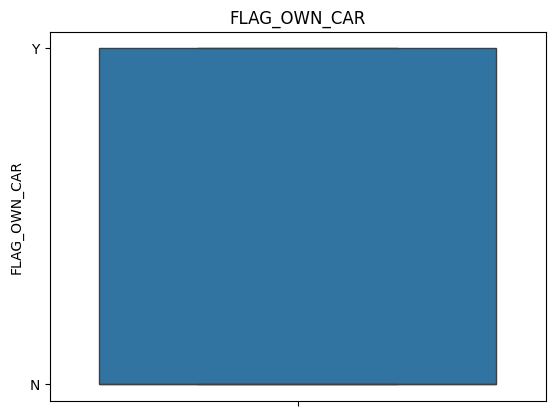

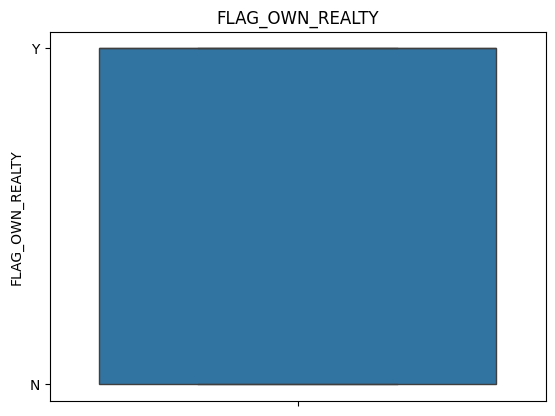

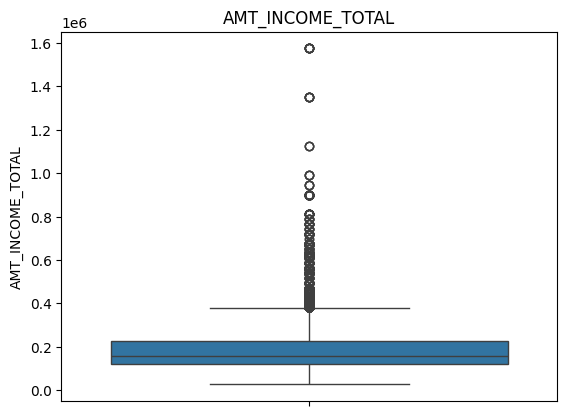

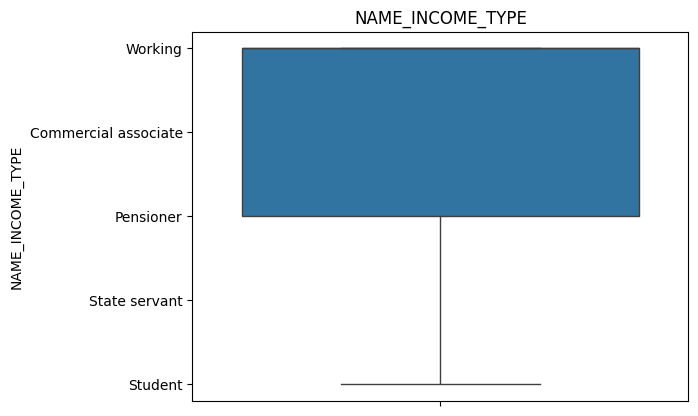

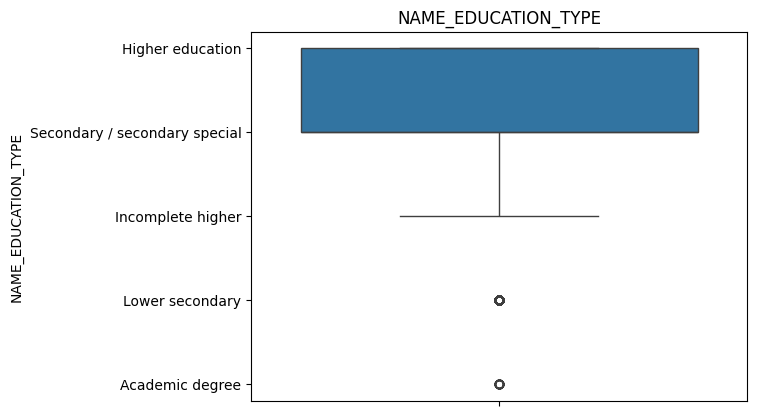

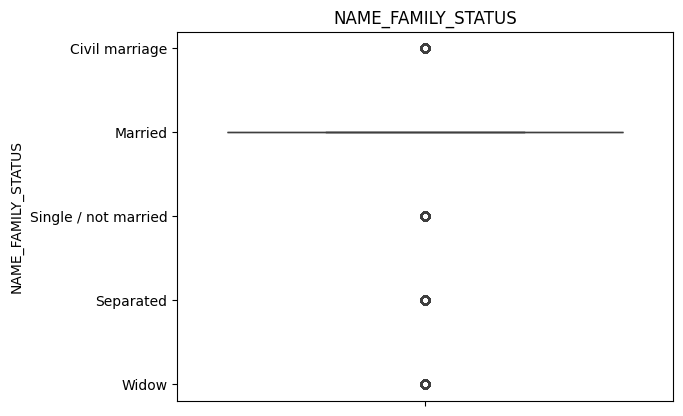

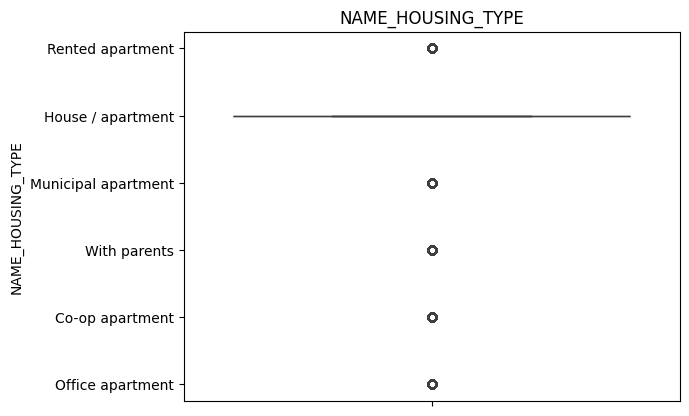

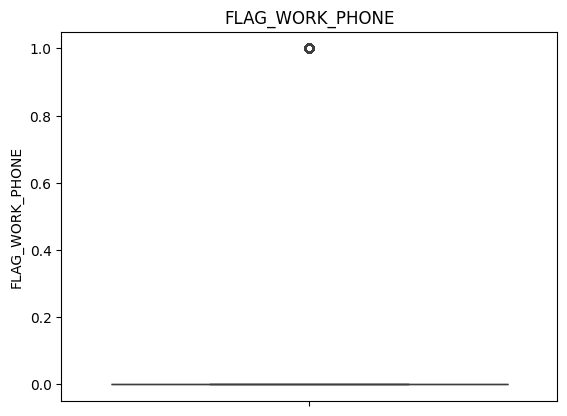

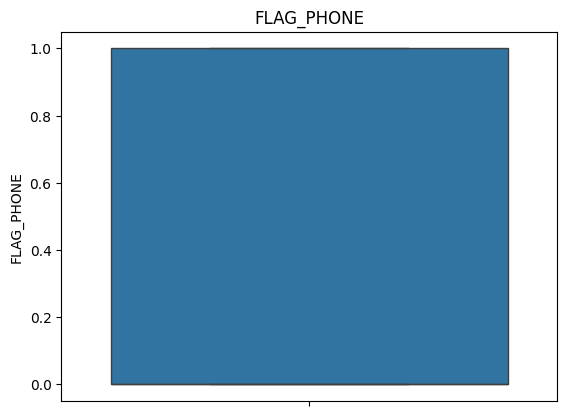

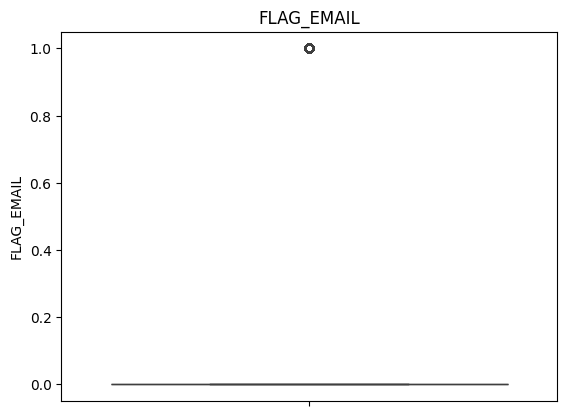

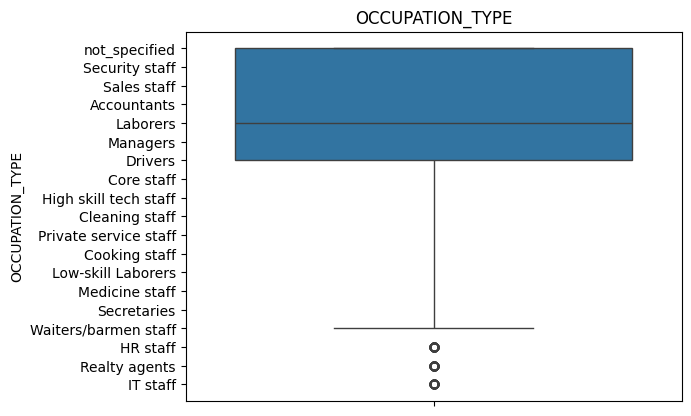

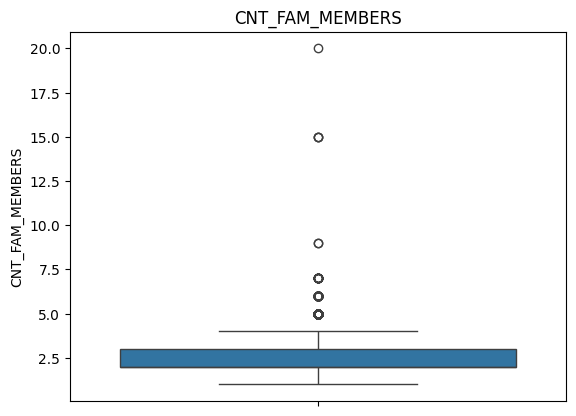

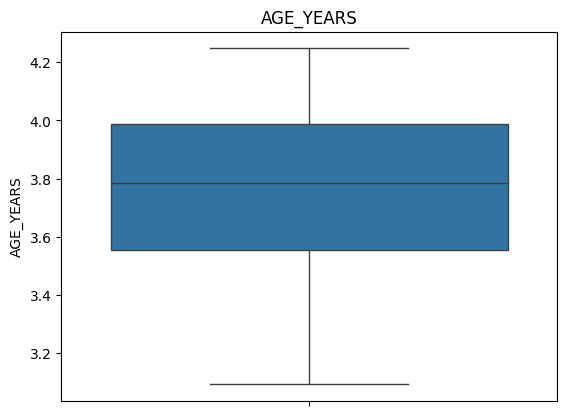

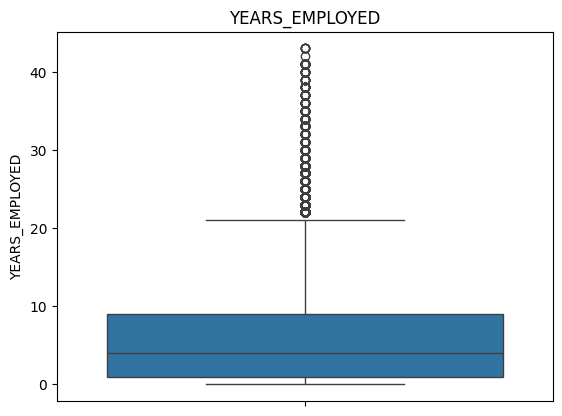

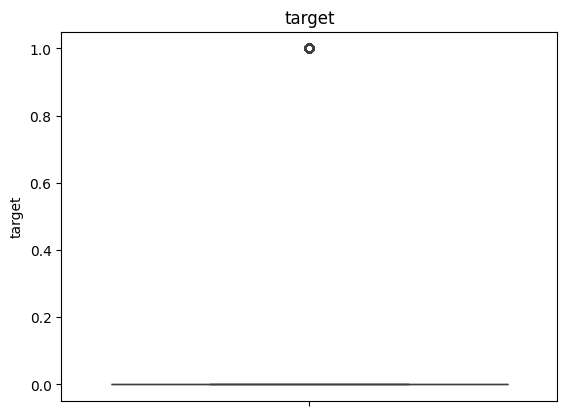

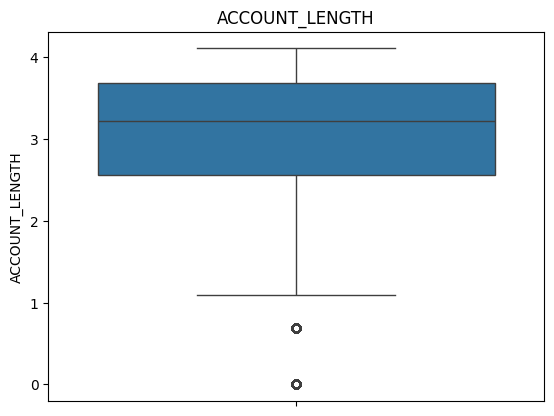

In [1595]:
import matplotlib.pyplot as plt
import seaborn as sns
# First we make boxplot of the features we selected to predict the outliers and remove if any
featured_dataset = dummy
fields = featured_dataset.columns
for column in fields:
    sns.boxplot(data=featured_dataset[column])
    plt.title(column)
    plt.show()

In [1597]:
dataset_a = df.copy()

# Selecting 1% of data from height column
dataset_a_1_perc = dataset_a['YEARS_EMPLOYED'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['YEARS_EMPLOYED'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in outcome row
dataset_a['YEARS_EMPLOYED'].isnull().sum()

<ipython-input-1597-8f7f5c46a80a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_a['YEARS_EMPLOYED'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN


365

In [1598]:
dataset_a['YEARS_EMPLOYED'] = dataset_a['YEARS_EMPLOYED'].fillna(dataset_a['YEARS_EMPLOYED'].mean())
dataset_a

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,2.365845,-0.217680,-0.908134,0.919119,1,2.772589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.365845,-0.217680,-0.908134,0.919119,1,2.708050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.728827,-0.217680,1.237411,-0.468064,0,3.401197,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.818509,-1.314564,0.768805,0.302593,0,1.609438,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.818509,-1.314564,0.768805,0.302593,0,3.295837,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.260605,-0.217680,0.394492,0.148462,1,2.484907,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,-0.286731,-0.217680,-0.798634,-0.313932,1,3.178054,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,-0.286731,-0.217680,-0.798634,-0.313932,1,3.496508,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,0.951138,-0.217680,0.548696,-0.622195,1,2.302585,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1599]:
dataset_a.isnull().sum()

AMT_INCOME_TOTAL                                     0
CNT_FAM_MEMBERS                                      0
AGE_YEARS                                            0
YEARS_EMPLOYED                                       0
target                                               0
ACCOUNT_LENGTH                                       0
CODE_GENDER_F                                        0
CODE_GENDER_M                                        0
FLAG_OWN_CAR_N                                       0
FLAG_OWN_CAR_Y                                       0
NAME_EDUCATION_TYPE_Academic degree                  0
NAME_EDUCATION_TYPE_Higher education                 0
NAME_EDUCATION_TYPE_Incomplete higher                0
NAME_EDUCATION_TYPE_Lower secondary                  0
NAME_EDUCATION_TYPE_Secondary / secondary special    0
FLAG_OWN_REALTY_N                                    0
FLAG_OWN_REALTY_Y                                    0
NAME_INCOME_TYPE_Commercial associate                0
NAME_INCOM

In [1602]:
# First we calculate 25 and 75 percentile for both columns
ttl_target_25_perc = featured_dataset['target'].quantile(0.25)
ttl_target_75_perc = featured_dataset['target'].quantile(0.75)
ttl_target_iqr = ttl_target_75_perc - ttl_target_25_perc

# Now we find the upper and lower limit
ttl_target_limit_upper_perc = ttl_target_75_perc + 1.5 * ttl_target_iqr
ttl_target_limit_lower_perc = ttl_target_25_perc - 1.5 * ttl_target_iqr

# Finding outliers
new_dataset = featured_dataset[featured_dataset['target'] < ttl_target_limit_upper_perc]
new_dataset = new_dataset[new_dataset['target'] > ttl_target_limit_lower_perc]

Above 25 and 75 percent method is one of the good methods to detect outliers.

In [1612]:
new_dataset.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH


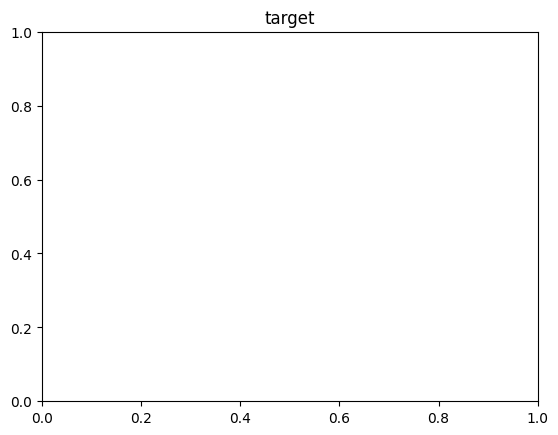

In [1603]:
# Now we box plot the features with no outliers
featured_dataset_no_outliers = new_dataset[['target']]
fields_no_outliers = featured_dataset_no_outliers.columns
for column in fields_no_outliers:
    sns.boxplot(data=featured_dataset_no_outliers[column])
    plt.title(column)
    plt.show()

In [1608]:
# Now we apply Logistic Regression on our new dataset without Outliers
logisticRegrNoOutliers = LogisticRegression()

y_no_outlier_data = new_dataset[['target']]
X_train_no_outlier_data, X_test_no_outlier_data, y_train_no_outlier_data, y_test_no_outlier_data = train_test_split(featured_dataset_no_outliers, y_no_outlier_data, test_size=0.1, random_state=42, stratify=y_no_outlier_data)
logisticRegrNoOutliers.fit(X_train_no_outlier_data, y_train_no_outlier_data)
threshold = 0.5
logisticRegrNoOutliers.predict(X_test_no_outlier_data)

ValueError: With n_samples=0, test_size=0.0001 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Below we have applied 1%,5%,10% removal of random data and observing the variance,bias and loss.




In [1605]:
dataset_a = df.copy()

# Selecting 1% of data from Total day minutes column
dataset_a_1_perc = dataset_a['target'].sample(frac=0.01)
# Replacing selected column values by NaN
dataset_a['target'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN

#Count of null values in Income row
dataset_a['target'].isnull().sum()

<ipython-input-1605-bb014ddeb00f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_a['target'].loc[dataset_a.index.isin(dataset_a_1_perc.index)]=np.NaN


365

In [1606]:
dataset_a['target'] = dataset_a['target'].fillna(dataset_a['target'].mean())
dataset_a

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,2.365845,-0.217680,-0.908134,0.919119,1.0,2.772589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.365845,-0.217680,-0.908134,0.919119,1.0,2.708050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.728827,-0.217680,1.237411,-0.468064,0.0,3.401197,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.818509,-1.314564,0.768805,0.302593,0.0,1.609438,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.818509,-1.314564,0.768805,0.302593,0.0,3.295837,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.260605,-0.217680,0.394492,0.148462,1.0,2.484907,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,-0.286731,-0.217680,-0.798634,-0.313932,1.0,3.178054,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,-0.286731,-0.217680,-0.798634,-0.313932,1.0,3.496508,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,0.951138,-0.217680,0.548696,-0.622195,1.0,2.302585,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1613]:
# # Checking Bias and Variance for 1% imputed data by mean
from mlxtend.evaluate import bias_variance_decomp
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values,
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

NameError: name 'X_train_no_outlier_data' is not defined

In [1614]:
dataset_b = df.copy()

dataset_b_1_perc = dataset_b['target'].sample(frac=0.05)
dataset_b['target'].loc[dataset_b.index.isin(dataset_b_1_perc.index)]=np.NaN

dataset_b['target'].isnull().sum()

<ipython-input-1614-b5bd674df7bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_b['target'].loc[dataset_b.index.isin(dataset_b_1_perc.index)]=np.NaN


1823

In [1615]:
dataset_b['target'] = dataset_b['target'].fillna(dataset_b['target'].median())
dataset_b

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,2.365845,-0.217680,-0.908134,0.919119,1.0,2.772589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.365845,-0.217680,-0.908134,0.919119,1.0,2.708050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.728827,-0.217680,1.237411,-0.468064,0.0,3.401197,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.818509,-1.314564,0.768805,0.302593,0.0,1.609438,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.818509,-1.314564,0.768805,0.302593,0.0,3.295837,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.260605,-0.217680,0.394492,0.148462,1.0,2.484907,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,-0.286731,-0.217680,-0.798634,-0.313932,1.0,3.178054,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,-0.286731,-0.217680,-0.798634,-0.313932,1.0,3.496508,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,0.951138,-0.217680,0.548696,-0.622195,1.0,2.302585,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1616]:
# Checking Bias and Variance for 5% imputed data by median

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values,
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

NameError: name 'X_train_no_outlier_data' is not defined

In [1617]:
# Checking Bias and Variance for 10% imputed data by mode

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(logisticRegrNoOutliers, X_train_no_outlier_data.values, y_train_no_outlier_data.values, X_test_no_outlier_data.values,
                                      y_test_no_outlier_data.values, loss='0-1_loss', random_seed=123)
# summarize results
print('Expected loss: %.3f' % avg_expected_loss)
print('Bias: %.3f' % avg_bias)
print('Variance: %.3f' % avg_var)

NameError: name 'X_train_no_outlier_data' is not defined

## Question and Answers


* What are the data types? (Only numeric and categorical)

ANS -
Numerical Columns - 'ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'

categorical - 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'

* Are there missing values?

Yes there are missing values for the column, OCCUPATION_TYPE.

* What are the likely distributions of the numeric variables?

Refer to Analysis of Numerical and categorical Variables

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

The useful variables are -
arget                                               1.000000
ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257
OCCUPATION_TYPE_Low-skill Laborers                   0.015274
OCCUPATION_TYPE_Security staff                       0.014359
NAME_FAMILY_STATUS_Single / not married              0.013716
OCCUPATION_TYPE_Core staff                           0.011522
OCCUPATION_TYPE_Managers                             0.010972
FLAG_OWN_CAR_N                                       0.010580
NAME_INCOME_TYPE_State servant                       0.010451
OCCUPATION_TYPE_Medicine staff                       0.009960
NAME_EDUCATION_TYPE_Academic degree                  0.009294
CNT_FAM_MEMBERS                                      0.009004
NAME_HOUSING_TYPE_Municipal apartment                0.008472
NAME_HOUSING_TYPE_Rented apartment                   0.008418
OCCUPATION_TYPE_IT staff                             0.008269
OCCUPATION_TYPE_High skill tech staff                0.008118
NAME_HOUSING_TYPE_Office apartment                   0.007218
NAME_HOUSING_TYPE_With parents                       0.007103
OCCUPATION_TYPE_HR staff                             0.007051
NAME_FAMILY_STATUS_Civil marriage                    0.006364
FLAG_PHONE_0                                         0.006355
OCCUPATION_TYPE_Cooking staff                        0.005707
YEARS_EMPLOYED                                       0.004712

* Which independent variables have missing data? How much?
OCCUPATION_TYPE - 134193


* Do the training and test sets have the same data?
No we don't have a training and testing test defined. Instead, we use train_test_split from scikit-learn such that 80% is training data and 20% is testing data.

* In the predictor variables independent of all the other predictor variables?

Yes the predictor variables are independent of all other predictor variables. From the heatmap, we can clearly confirm that there is no scope of multicollinearity.

* Which predictor variables are the most important?

ACCOUNT_LENGTH                                       0.085220
FLAG_OWN_REALTY_N                                    0.027990
AMT_INCOME_TOTAL                                     0.024202
CODE_GENDER_M                                        0.021257
FLAG_EMAIL_1                                         0.019658
NAME_EDUCATION_TYPE_Incomplete higher                0.018118
NAME_INCOME_TYPE_Commercial associate                0.016257

* Do the ranges of the predictor variables make sense?

The ranges of the predictor varibales does make sense.

* What are the distributions of the predictor variables?   
ANS - We get normal distribution for all the predictor variables in form of bell curve.
* Remove outliers and keep outliers (does if have an effect of the final predictive model)?
ANS - After removing outlier in final predictive model we will get different confusion matrix value.
* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

#Conclusion
The analysis revealed significant insights into the dataset, such as the impact of income and employment tenure on credit amounts. The engineered 'Credit-to-Income Ratio' feature proved valuable in assessing credit risk. The logistic regression model demonstrated potential in predicting credit approval, with income and credit ratios as key predictors.
It's recommended to further investigate the outliers in age and employment tenure to ensure they represent accurate data. Additionally, exploring more complex models like random forests or gradient boosting could potentially improve prediction accuracy.

## License

MIT License
Copyright (c) 2023 Bhagya Trivedi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## References

1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1
2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6
3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/
5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html
6)https://www.datacamp.com/community/tutorials/xgboost-in-python
7)https://github.com/MayurAvinash/DESM_INFO6105/blob/main/Model_Interpretability_Assignment.ipynb